# Classification model using KNN

### 1. Import libraries

In [1]:
import pandas as pd
from sklearn import neighbors
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np
from scipy.spatial import distance
from sklearn import model_selection

### 2. Upload Clinic data

In [2]:
path ="../../../../Data_preprocessing/RNA_post_autoencoder/encoded_data_binary_43.csv"
data = pd.read_csv(path)
data.reset_index
data.round(5)
data=data.iloc[:,1:440  ] 
data.head()

,Target,0,1,2,3,4,5,6,7,8,...,33,34,35,36,37,38,39,40,41,42
0,1,0.153994,-0.164904,-0.452284,0.206749,-0.857082,-0.603124,-0.473103,-0.075513,0.054750,...,-0.037600,-0.128832,-0.385064,0.116692,1.490244,1.059520,-1.272441,0.110960,-0.101009,0.161909
1,1,-1.300332,-0.080441,-0.885911,-0.168431,-0.529857,0.184833,-0.464027,-0.361125,0.125864,...,-0.443480,-0.222192,-0.440740,-0.388554,0.997358,0.816687,-1.113903,0.362072,-0.397896,1.188868
2,1,-0.876637,0.587383,-0.925414,0.488304,-0.181991,0.184868,-0.708685,1.060296,0.210958,...,0.440405,0.441728,0.479298,-0.410674,-0.082885,1.063791,-0.764444,0.862694,0.316916,1.723327
3,0,-1.598357,0.092854,-0.473400,-0.009476,-1.107011,0.699234,-1.599456,-0.220610,0.247359,...,-0.878015,-0.766315,-0.725781,-0.124278,0.621617,1.027331,-1.433755,0.882461,0.018591,1.787526
4,1,-1.735836,0.207939,-0.211755,-0.703383,-0.802869,-0.273099,-1.267936,-0.063031,-0.612482,...,-0.671282,1.156629,1.303665,0.926794,0.740702,-0.010802,0.001432,1.500137,0.100971,0.812671


In [3]:
Y = data.Target # Target column

X = data.iloc[:,1:439] # I selected all the columns by removing the Unnamed column (row id) and the Target column.

print(X)
print('Numero de pacientes: ',len(Y))

            0         1         2         3         4         5         6  \
0    0.153994 -0.164904 -0.452284  0.206749 -0.857082 -0.603124 -0.473103   
1   -1.300332 -0.080441 -0.885911 -0.168431 -0.529857  0.184833 -0.464027   
2   -0.876637  0.587383 -0.925414  0.488304 -0.181991  0.184868 -0.708685   
3   -1.598357  0.092854 -0.473400 -0.009476 -1.107011  0.699234 -1.599456   
4   -1.735836  0.207939 -0.211755 -0.703383 -0.802869 -0.273099 -1.267936   
..        ...       ...       ...       ...       ...       ...       ...   
176 -1.222742  0.033713 -0.588393 -0.369282 -0.914620  0.613994 -1.088500   
177 -0.916295  0.632799  0.010232  1.049555 -0.321448 -0.182999 -1.356915   
178 -0.499931  0.487778 -0.365115 -0.074394 -0.231141  0.391114 -0.622813   
179 -0.790637  0.102222 -1.135601 -0.301596 -0.794871  0.188501 -0.760856   
180 -0.297094  0.420879 -0.209357  0.319454 -0.118073 -0.411617 -1.117591   

            7         8         9  ...        33        34        35  \
0  

### 3. Train-Test dataset split

In [4]:
XTrain, XTest, yTrain, yTest = train_test_split(X, Y, test_size=0.20, random_state=125, stratify=Y)

print('Training set size:', len(XTrain))
print('Target column size of the training set:', len(yTrain))
print('Test set size:', len(XTest))
print('Target column size of the test set:', len(yTest))

Training set size: 144
Target column size of the training set: 144
Test set size: 37
Target column size of the test set: 37


### 4. Study the best value for K

In [5]:
neighbors = list(range(1,8))
cek = []
list_accuracy = []
best_acuracy = 0
best_k = 0
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    pred = knn.fit(XTrain, yTrain).predict(XTest)
    if accuracy_score(yTest, pred) >= best_acuracy:
        best_k = k
        best_acuracy=accuracy_score(yTest, pred)
    list_accuracy.append(accuracy_score(yTest, pred))

print("Best accuracy is obtained with k = " + str(best_k)+ " and is: %.4f" % (best_acuracy))


Best accuracy is obtained with k = 7 and is: 0.6216


C:\Users\sandr\AppData\Local\Temp/ipykernel_14848/3738168230.py:1: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(np.append(np.roll(list_accuracy,1),list_accuracy[6]),'ro', color='r', linestyle='dashed',linewidth=1.0, label="Graph2")
C:\Users\sandr\AppData\Local\Temp/ipykernel_14848/3738168230.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(best_k, best_acuracy, 'ro', color ='g')


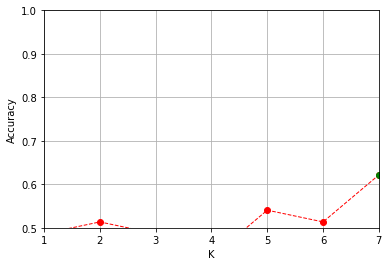

In [6]:
plt.plot(np.append(np.roll(list_accuracy,1),list_accuracy[6]),'ro', color='r', linestyle='dashed',linewidth=1.0, label="Graph2")
# Green dot represent best K value
plt.plot(best_k, best_acuracy, 'ro', color ='g')
plt.axis([1, 7, 0.5, 1])
plt.xlabel('K')
plt.ylabel('Accuracy')

plt.grid()
plt.show()

### 5. Best metric study (manhattan or euclidean)

In [7]:
# Estudio de la mejor métrica
from sklearn import neighbors
# Euclidean distance model
euclid_model = KNeighborsClassifier(n_neighbors=best_k, metric=distance.sqeuclidean)
euclid_model.fit(XTrain,yTrain) 

# Manhattan distance model
manhattan_model = KNeighborsClassifier(n_neighbors=best_k, metric=distance.cityblock) 
manhattan_model.fit(XTrain, yTrain)

KNeighborsClassifier(metric=<function cityblock at 0x000001E3FEE2C280>,
                     n_neighbors=7)

In [8]:
manhattan_predictions = manhattan_model.predict(XTest)
euclid_predictions = euclid_model.predict(XTest) 
df = pd.DataFrame({'actual': yTest, 'manhattan': manhattan_predictions, 'euclid': euclid_predictions})
df.head()

,actual,manhattan,euclid
155,0,1,1
18,1,0,0
143,0,1,1
136,1,1,1
84,0,1,1


In [9]:
# Cross validation
result1= model_selection.cross_val_score(euclid_model, XTrain, yTrain, cv=5, scoring='accuracy')
result2 = model_selection.cross_val_score(manhattan_model, XTrain, yTrain, cv=5, scoring='accuracy')
print("Best result of the cross validation of the model (euclidean) with the best paramters: " +str(np.mean(result1)))
print("Best result of the cross validation of the model (mahattan) with the best paramters:: " +str(np.mean(result2)))


Best result of the cross validation of the model (euclidean) with the best paramters: 0.5834975369458129
Best result of the cross validation of the model (mahattan) with the best paramters:: 0.6044334975369459


#### 6.1. Manhattan model

In [10]:
# Making predictions with the optimal model on the training dataset
yhatTrain = manhattan_model.predict(XTrain)
contTrain = 0
yTrain=yTrain.to_numpy()

# Comparing with the Target column and check how many hits there have been
for i in range(0,len(yTrain),1) :
    if (yhatTrain[i] == yTrain[i]):
        contTrain = contTrain + 1

In [11]:
# Making predictions with the optimal model on the test dataset
mayhatTest = manhattan_model.predict(XTest)
contTest = 0
yTest=yTest.to_numpy()

# Comparing with the Target column and check how many hits there have been
for i in range(0,len(yTest),1) :
    if (mayhatTest[i] == yTest[i]):
        contTest = contTest + 1

In [12]:
print('Final accuracy on the training dataset (manhattan): ' + str(contTrain/len(yTrain)))
print('Final accuracy on the testing dataset (manhattan): ' + str(contTest/len(yTest)))

Final accuracy on the training dataset (manhattan): 0.6944444444444444
Final accuracy on the testing dataset (manhattan): 0.4864864864864865


In [13]:
from sklearn.metrics import classification_report,confusion_matrix

print('----------------Confusion Matrix (Training)------------------')
print(confusion_matrix(yTrain,yhatTrain))
print('Input data:  ' + str(np.array(yTrain)))
print('Prediction:        ' +str(yhatTrain))

----------------Confusion Matrix (Training)------------------
[[44 24]
 [20 56]]
Input data:  [1 0 1 0 1 1 0 0 1 0 1 0 1 0 1 1 0 1 1 1 0 0 0 1 0 0 0 0 0 1 1 1 1 1 0 1 1
 0 0 1 1 1 1 1 0 0 1 1 1 0 0 0 1 0 0 1 0 1 1 1 0 1 1 0 0 0 0 1 1 1 0 1 0 0
 0 1 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 1 0 1 0 0 1 0 1 0 0 1 0 0 1 1 1 1 0 1 1
 1 1 0 1 0 0 0 1 0 1 0 1 0 0 1 1 1 0 0 0 1 0 1 0 0 0 1 1 1 1 1 0 1]
Prediction:        [1 0 1 0 1 0 0 0 0 0 1 1 1 0 1 1 0 1 1 1 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 0 1 0 0 0 1 0 0 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 1 1 1 1
 0 1 0 1 1 0 1 1 1 0 0 0 0 0 1 1 0 1 1 0 1 1 1 0 0 0 1 0 0 0 0 1 1 1 1 1 1
 1 1 0 1 0 0 0 0 0 1 0 0 0 1 1 1 0 0 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1]


In [14]:
print(classification_report(yTrain,yhatTrain))

              precision    recall  f1-score   support

           0       0.69      0.65      0.67        68
           1       0.70      0.74      0.72        76

    accuracy                           0.69       144
   macro avg       0.69      0.69      0.69       144
weighted avg       0.69      0.69      0.69       144



In [15]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(yTest, mayhatTest)
print('----------------Confusion Matrix (Test)------------------')
print(confusion_matrix)
print('Input data:  ' + str(np.array(yTest)))
print('Prediction:        ' +str(mayhatTest))

----------------Confusion Matrix (Test)------------------
[[ 5 12]
 [ 7 13]]
Input data:  [0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 1 0 0 0 1 1 0 0 1 0 1 1 0 0 0 1 1 0 1 0]
Prediction:        [1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 0 1 0 0 1 0 1 0 0 1 1]


In [16]:
print(classification_report(yTest, mayhatTest))

              precision    recall  f1-score   support

           0       0.42      0.29      0.34        17
           1       0.52      0.65      0.58        20

    accuracy                           0.49        37
   macro avg       0.47      0.47      0.46        37
weighted avg       0.47      0.49      0.47        37

